<a href="https://colab.research.google.com/github/arehfeldt/machine-learning-dump/blob/main/Covid19_Risk_State_Level_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import necessary libraries and CSV File
Use data.csv that is submitted with the assignment when prompted to upload

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time as t
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import itertools
from google.colab import files
import io
import random

print("Select File With Training Data")
data = files.upload()
print("Select File With Prediction Data")
to_predict = files.upload()

Select File With Training Data


Saving data.csv to data.csv
Select File With Prediction Data


Saving predict.csv to predict.csv


#Set and Display DataFrame and Covariance Matrix

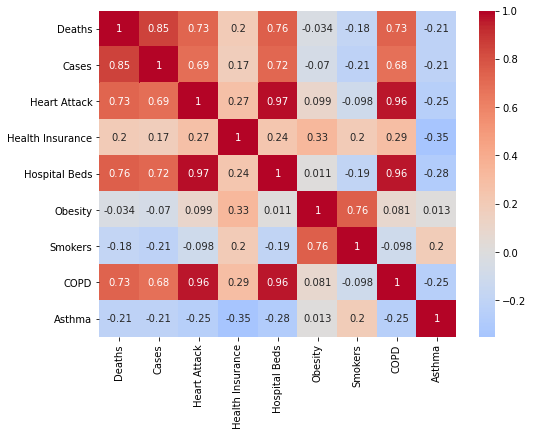

In [ ]:
covid_data = pd.read_csv(io.BytesIO(data['data.csv'])).iloc[:,1:]
prediction_data = pd.read_csv(io.BytesIO(to_predict['predict.csv']))

correlation_matrix = covid_data.corr().round(3)
plt.figure(figsize=(8,6))
sb.heatmap(data=correlation_matrix, annot=True, center=0.0, cmap='coolwarm')

#Prepare for training
1. Save mean and standard deviation of Covid Deaths for final predictions
2. Normalize columns
3. Seperate target from features
4. Split training and testing sets

In [ ]:
column_names = covid_data.columns
raw_covid_data = covid_data.to_numpy()
raw_prediction_data = prediction_data.to_numpy()
state_labels = prediction_data[['State']]
mean_deaths = np.mean(raw_covid_data[:,0])
std_deaths = np.std(raw_covid_data[:,0])
normalized_prediction_data = pd.DataFrame(state_labels, columns=['State'])

for i in range(raw_covid_data.shape[1]):
  mean = np.mean(raw_covid_data[:,i])
  std = np.std(raw_covid_data[:,i])
  raw_covid_data[:,i] = (raw_covid_data[:,i] - mean) / std
  if (i >= 1):
    normalized_prediction_data[prediction_data.columns[i]] = (raw_prediction_data[:,i] - mean) / std

normalized_covid_data = pd.DataFrame(raw_covid_data, columns=column_names)

display(normalized_prediction_data)

print(f"Mean of Deaths to Covid-19: {mean_deaths:20,.2f}\nStandard Deviation of Deaths to Covid-19: {std_deaths:.2f}\n")

target = normalized_covid_data.iloc[:,0]
features = normalized_covid_data.iloc[:,1:]

covid_traindata, covid_testdata, covid_traintarget, covid_testtarget = train_test_split(features, target, test_size=0.3)
print()
print(f"Shape of training data: {covid_traindata.shape}\nShape of testing data: {covid_testdata.shape}")

,State,Cases,Heart Attack,Health Insurance,Hospital Beds,Obesity,Smokers,COPD,Asthma
0,AL,-0.437192,-0.220645,0.670693,-0.0321282,1.26894,0.796514,0.168798,0.288637
1,AK,-0.538711,-0.905604,1.23421,-0.864937,-0.464062,0.765971,-0.985821,-0.39077
2,AZ,-0.402783,-0.249556,0.924275,-0.124525,-0.464062,-0.791723,0.234856,0.062168
3,AR,-0.532797,0.315758,0.0226511,-0.368148,1.50174,1.86552,-0.239021,-0.61724
4,CA,-0.0103389,3.41853,-0.343634,3.59711,-1.4211,-1.64693,3.50436,-1.14567
5,CO,-0.127028,-0.484399,-0.202755,-0.297254,-2.1712,-0.639008,-0.161838,-0.39077
6,CT,-0.345063,-0.611605,-0.935324,-0.483658,-1.00724,-1.3415,-0.582521,0.892555
7,DE,-0.494893,-0.846004,-0.76627,-0.838124,0.570569,-0.0281475,-0.876999,-0.61724
8,DC,-0.553439,-0.8847,-1.66789,-0.745566,-1.70562,-0.852809,-1.00668,0.439617
9,FL,1.07598,2.25811,1.85407,2.25292,-0.153673,-0.639008,3.14209,-1.97605


Mean of Deaths to Covid-19:               520.87
Standard Deviation of Deaths to Covid-19: 904.10


Shape of training data: (249, 8)
Shape of testing data: (108, 8)


#Get baseline RMSE and R2 scores
1. Fit and test line using all features
2. Fit and test line only using the number of new cases

In [ ]:
# fit all features to covid-19 deaths
t0 = t.time()
model = LinearRegression()
model.fit(covid_traindata, covid_traintarget)
print(f"Trained model on all features in {t.time() - t0} seconds")
covid_death_prediction = model.predict(covid_testdata)
RMSE = np.sqrt(mean_squared_error(covid_testtarget,covid_death_prediction))
r2 = r2_score(covid_testtarget,covid_death_prediction)
print(f"RMSE score for all features is {RMSE}")
print(f"R2 score for all features is {r2}")

print()

# fit only number of new covid-19 cases to covid-19 deaths
t0 = t.time()
model = LinearRegression()
model.fit(covid_traindata[['Cases']], covid_traintarget)
print(f"Trained model with Number of New Cases all features in {t.time() - t0} seconds")
covid_death_prediction = model.predict(covid_testdata[['Cases']])
RMSE = np.sqrt(mean_squared_error(covid_testtarget,covid_death_prediction))
r2 = r2_score(covid_testtarget,covid_death_prediction)
print(f"RMSE score for Number of New Cases features is {RMSE}")
print(f"R2 score for Number of New Cases features is {r2}")

Trained model on all features in 0.034970998764038086 seconds
RMSE score for all features is 0.5932686030482305
R2 score for all features is 0.6787052922255259

Trained model with Number of New Cases all features in 0.0026090145111083984 seconds
RMSE score for Number of New Cases features is 0.6603710670948137
R2 score for Number of New Cases features is 0.6019139893323882


# Test all combinations of features
1. Test all unique combinations of features of 1 through k-1 size
2. Score each combination and track best combination of each size

In [ ]:
test_size = 100

def get_feature_selection(columns, n):
  return itertools.combinations(columns, n)

feature_list = covid_traindata.columns
best_combinations = {}
for k in range(1, len(feature_list) + 1):
  best_features = []
  best_RMSE = 1000000
  best_r2 = 0
  selected_features = get_feature_selection(feature_list, k)
  for selections in selected_features:
    # test feature for 25 tests
    RMSE = 0
    for tests in range(test_size):
      covid_traindata, covid_testdata, covid_traintarget, covid_testtarget = train_test_split(features, target, test_size=0.3)
      # convert to correct iterable
      current_columns = [selection for selection in selections]

      # fit model to current selection of features
      model = LinearRegression()
      model.fit(covid_traindata[current_columns], covid_traintarget)

      # test and score model
      covid_death_prediction = model.predict(covid_testdata[current_columns])
      RMSE += np.sqrt(mean_squared_error(covid_testtarget,covid_death_prediction))

    # determine if current features are better than previous
    RMSE /= test_size
    if RMSE < best_RMSE:
      best_RMSE = RMSE
      best_features = current_columns
      best_r2 = r2_score(covid_testtarget,covid_death_prediction)
  print('-'*50)
  print(f"Best combination of size {k} over {test_size} tests was {best_features[:]}")
  print(f"Best combination of size {k} over {test_size} tests had RSME score of {best_RMSE:0.4f}")
  print(f"Best combination of size {k} over {test_size} tests had R2 score of {best_r2:0.4f}")
  best_combinations.setdefault(k, best_features)
print('-'*50)

--------------------------------------------------
Best combination of size 1 over 100 tests was ['Cases']
Best combination of size 1 over 100 tests had RSME score of 0.5479
Best combination of size 1 over 100 tests had R2 score of 0.6146
--------------------------------------------------
Best combination of size 2 over 100 tests was ['Cases', 'Heart Attack']
Best combination of size 2 over 100 tests had RSME score of 0.4847
Best combination of size 2 over 100 tests had R2 score of 0.5659
--------------------------------------------------
Best combination of size 3 over 100 tests was ['Cases', 'Heart Attack', 'Smokers']
Best combination of size 3 over 100 tests had RSME score of 0.4852
Best combination of size 3 over 100 tests had R2 score of 0.8392
--------------------------------------------------
Best combination of size 4 over 100 tests was ['Cases', 'Heart Attack', 'Obesity', 'Asthma']
Best combination of size 4 over 100 tests had RSME score of 0.4741
Best combination of size 4 ov

#Test best features with Bootstrap Aggregation
1. Setup function to generate unique permutation of training set
2. Train multiple models with same features on different permutation
3. Average predictions of all models into final prediction
4. Score final prediction and compare multiple aggregation size

In [ ]:
aggregation_sizes = [1, 5, 10]
test_size = 25
best_combination = ['Cases', 'Heart Attack', 'Health Insurance', 'Hospital Beds', 'Obesity', 'COPD', 'Asthma']

# generate and return a random sample of the original training data with replacement
def generate_sample(train_data, train_target):
  idx = [i for i in range(train_data.shape[0])]
  random_permutation = random.choices(idx, k=train_data.shape[0])
  new_train_data = pd.DataFrame(columns=train_data.columns)
  new_train_target = pd.DataFrame(columns=["Deaths"])
  for i in random_permutation:
    new_train_data.loc[len(new_train_data.index)] = train_data.iloc[i, :]
    new_train_target.loc[len(new_train_target.index)] = train_target.iloc[i]
  return new_train_data, new_train_target


# Generate a new set of data
covid_traindata, covid_testdata, covid_traintarget, covid_testtarget = train_test_split(features, target, test_size=0.3)

# test all aggregation size
for aggregation_size in aggregation_sizes:
  # initialize values for aggregate prediction
  aggregate_RMSE = 0
  aggregate_R2 = 0
  for i in range(test_size):
    aggregate_prediction = np.zeros(covid_testdata.shape[0])

    for aggregate in range(aggregation_size):
      # generate a unique permutation of the training set for each model we want to aggregate
      aggregate_traindata, aggregate_traintargets = generate_sample(covid_traindata, covid_traintarget)

      # create and train the model
      model = LinearRegression()
      model.fit(covid_traindata[best_combination], covid_traintarget)

      # generate predictions with the model
      prediction = model.predict(covid_testdata[best_combination])
      aggregate_prediction += prediction

    # average all predictions of all models
    aggregate_prediction /= aggregation_size

    # score aggregated model
    aggregate_RMSE += np.sqrt(mean_squared_error(covid_testtarget,aggregate_prediction))
    aggregate_R2 += r2_score(covid_testtarget,aggregate_prediction)

  aggregate_RMSE /= test_size
  aggregate_R2 /= test_size
  print(f"Aggregation Size: {aggregation_size}")
  print(f"Feature List: {best_combination}")
  print(f"RMSE: {aggregate_RMSE}")
  print(f"R2: {aggregate_R2}")

Aggregation Size: 1
Feature List: ['Cases', 'Heart Attack', 'Health Insurance', 'Hospital Beds', 'Obesity', 'Smokers', 'COPD', 'Asthma']
RMSE: 0.497744109455311
R2: 0.7830192792147416
Aggregation Size: 5
Feature List: ['Cases', 'Heart Attack', 'Health Insurance', 'Hospital Beds', 'Obesity', 'Smokers', 'COPD', 'Asthma']
RMSE: 0.497744109455311
R2: 0.7830192792147416
Aggregation Size: 10
Feature List: ['Cases', 'Heart Attack', 'Health Insurance', 'Hospital Beds', 'Obesity', 'Smokers', 'COPD', 'Asthma']
RMSE: 0.497744109455311
R2: 0.7830192792147416


# Train Final Model and Generate Prediction of Next Two Weeks

for the purpose of this project I simply imported a csv containing the data I need to use for the predictions which I generated seperately.

In [ ]:
test_size = 100
best_combination = ['Cases', 'Heart Attack', 'Health Insurance', 'Hospital Beds', 'Obesity', 'COPD', 'Asthma']

covid_traindata, covid_testdata, covid_traintarget, covid_testtarget = train_test_split(features, target, test_size=0.3)
# convert to correct iterable
final_RMSE = 0
final_R2 = 0
# fit model to current selection of features
model = LinearRegression()

for i in range(test_size):
  if (i + 1) % 10 == 0: print(f"Finished test: {i + 1}")
  model.fit(covid_traindata[best_combination], covid_traintarget)

  # test and score model
  covid_death_prediction = model.predict(covid_testdata[best_combination])
  final_RMSE += np.sqrt(mean_squared_error(covid_testtarget,covid_death_prediction))
  final_R2 += r2_score(covid_testtarget,covid_death_prediction)

final_RMSE /= test_size
final_R2 /= test_size

print(f"Feature List: {best_combination}")
print(f"RMSE: {final_RMSE}")
print(f"R2: {final_R2}")

# generate final predictions from prediction set
future_predictions = model.predict(prediction_data[best_combination])
future_raw_predictions = future_predictions * mean_deaths
future_raw_predictions[future_raw_predictions < 0] = 0
final_prediction_frame = pd.DataFrame()
final_prediction_frame['State'] = state_labels.iloc[:,0]
final_prediction_frame['Score'] = future_predictions / np.max(future_predictions) * 10
final_prediction_frame['On Hover'] = final_prediction_frame.apply(lambda row: f"Location: {row.State}\tScore: {row.Score:.2f}", axis=1)


Finished test: 10
Finished test: 20
Finished test: 30
Finished test: 40
Finished test: 50
Finished test: 60
Finished test: 70
Finished test: 80
Finished test: 90
Finished test: 100
Feature List: ['Cases', 'Heart Attack', 'Health Insurance', 'Hospital Beds', 'Obesity', 'COPD', 'Asthma']
RMSE: 0.482182840012465
R2: 0.7141746636151554


#Generate final chloropleth map
This is mostly not my original code. I want to credit the source here: \
https://datascience.stackexchange.com/questions/9616/how-to-create-us-state-choropleth-map

In [ ]:
import plotly.express as px

fig = px.choropleth(final_prediction_frame,  # Input Pandas DataFrame
                    locations="State",  # DataFrame column with locations
                    color="Score",  # DataFrame column with color values
                    hover_name="On Hover", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Risk of Covid-19', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output the plot to the screen